In [1]:
#Importing warning library to avoid any warnings
import warnings
warnings.filterwarnings('ignore')

# Loading the train dataset

In [2]:
import pandas as pd
df_train=pd.read_csv('D:/Python file/Project Datasets/FinalEval/Restaurant/Data_Train.csv')  #Path location of the dataset
df_train.head()  #Checking out the top 5 rows of the dataset

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [3]:
df_train.shape    #Checking the dimensions of the dataset

(12690, 9)

In [4]:
df_train.columns   #Checking out the columns of the dataset

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

# Dataset Description 

Introduction:

    Who doesn’t love food? All of us must have craving for at least a few favourite food items, we may also have a few places where we like to get them, a restaurant which serves our favourite food the way we want it to be. But there is one factor that will make us reconsider having our favourite food from our favourite restaurant, the cost.You will use your Data Science skills to investigate the factors that really affect the cost, and who knows maybe you will even gain some very interesting insights that might help you choose what to eat and from where.
    
Feature Description:

-> There are 12690 rows of data and 9 columns present in this dataset and the description of the features are given below:

    1.TITLE: The feature of the restaurant which can help identify what and for whom it is suitable for.

    2.RESTAURANT_ID: A unique ID for each restaurant.

    3.CUISINES: The variety of cuisines that the restaurant offers.

    4.TIME: The open hours of the restaurant.

    5.CITY: The city in which the restaurant is located.

    6.LOCALITY: The locality of the restaurant.

    7.RATING: The average rating of the restaurant by customers.

    8.VOTES: The overall votes received by the restaurant.

    9.COST: The average cost of a two-person meal.

# Our agenda in this project

-> We will be predicting the cost of the food served by the restaurants across different cities in India.

-> First, use the train dataset and do the EDA process, fitting the best model and saving the model.

-> Then, use the test dataset and do the EDA process, load the saved model and predict the values over the test data.

In [5]:
df_train.info()    #Checking the info of all the columns present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


Except for RESTAURANT_ID and COST, all other columns are in object datatype and we need to handle it.

In [6]:
df_train.isnull().sum()   #Checking for null values in the dataset

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

There are missing data in CITY, LOCALITY, RATING and VOTES column and we need to fill them with data

# Data pre-processing

In [7]:
#Now we will be checking the unique values in the dataset
for i in df_train.columns:
    print(df_train[i].value_counts())
    print('\n')

QUICK BITES             4218
CASUAL DINING           3652
None                    1003
CAFÉ                     607
DESSERT PARLOR           382
                        ... 
BAKERY,CONFECTIONERY       1
CLUB,MICROBREWERY          1
MICROBREWERY,LOUNGE        1
PUB,CAFÉ                   1
BAR,CLUB                   1
Name: TITLE, Length: 113, dtype: int64


7264     8
4634     7
9910     6
13173    5
1571     5
        ..
461      1
2508     1
14794    1
10696    1
0        1
Name: RESTAURANT_ID, Length: 11892, dtype: int64


South Indian                                  532
North Indian                                  526
North Indian, Chinese                         501
Fast Food                                     286
Chinese                                       167
                                             ... 
Pizza, Italian, Desserts, Burger, American      1
South Indian, Kerala, Italian                   1
Desserts, Kerala, Chinese                       1
Pizza, Burger, Fas

Observations:

-> The cuisines are of 4155 types.

-> The unique value of time is 2689.

-> The votes is 1847 unique types.

-> The locality is 1416 unique types.

-> 359 unique cities are mentioned.

-> 1416 different localities are mentioned.

-> There are 11892 restaurant IDs.

-> Title of cuisines is of 113 different types.

-> Cost is 86 unique values.

-> Ratings is 32 different types.

Let's look the votes column. We need to remove the word votes and we need to fill the missing data and convert into float as there are null values. For filling the missing data, we will use fillna.

In [8]:
df_train['VOTES']=df_train['VOTES'].str.replace('votes','').astype(float) 
#We are replacing votes with blank and converting into int type

In [9]:
df_train['VOTES']=df_train['VOTES'].fillna(df_train['VOTES'].mean())
#Filling missing data with the mean value

In [10]:
#Checking if there are any missing values
print(df_train['VOTES'].isnull().sum())

0


We have handled the VOTES column. Let's check the RATING column. In some rows there are '-' and 'NEW' in the rating. We will replace it with missing data.

In [11]:
import numpy as np  #Using numpy library
df_train['RATING'] = df_train["RATING"].replace("-", np.NaN)
df_train['RATING'] = df_train["RATING"].replace("NEW", np.NaN)

In [12]:
#Checking for missing values after replacing - and NEW
print(df_train['RATING'].isnull().sum())

1204


In [13]:
#Replacing the missing data with mode value using fillna
df_train['RATING'].fillna(df_train['RATING'].mode().values[0], inplace=True)

In [14]:
#Converting into float
df_train['RATING']=df_train['RATING'].astype(float)

In [15]:
#Checking if there are any missing values
print(df_train['RATING'].isnull().sum())

0


We have handled the RATING column. Let's check the CITY and LOCALITY column. We need to fill the missing data accordingly because sometimes it can mismatch the data and it will be a problem.

In [16]:
#We will be replacing CITY details using available LOCALITY details
df_train.iloc[246,4]='Kochi'
df_train.iloc[817,4]='Navi Mumbai'
df_train.iloc[5149,4]='Navi Mumbai'
df_train.iloc[5297,4]='Kochi'
df_train.iloc[6397,4]='Mumbai'
df_train.iloc[6451,4]='Chennai'
df_train.iloc[8456,4]='Bangalore'
df_train.iloc[8735,4]='Chennai'
df_train.iloc[9121,4]='Bangalore'
df_train.iloc[9268,4]='Kochi'
df_train.iloc[10200,4]='Thane'
df_train.iloc[10704,4]='Chennai'
df_train.iloc[11491,4]='Chennai'
df_train.iloc[12181,5]='Kadubesanahalli'
df_train.iloc[12314,4]='Bangalore'
df_train.iloc[12447,4]='Hyderabad'

In [17]:
#Replacing NaN data with missing word in CITY and LOCALITY
df_train['CITY']=df_train['CITY'].fillna('missing')
df_train['LOCALITY']=df_train['LOCALITY'].fillna('missing')

In [18]:
df_train.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

We can see that all the missing data has been handled and we can proceed further with our analysis

In [19]:
df_train    #Checking the dataset

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546.0,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214.0,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608.0,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32.0,400


# Exploratory Data Analysis

In [20]:
#Importing Matplotlib and Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Univariate Analysis

300      1595
400      1357
500      1300
200      1031
600       806
         ... 
4100        1
70          1
14000       1
1950        1
80          1
Name: COST, Length: 86, dtype: int64




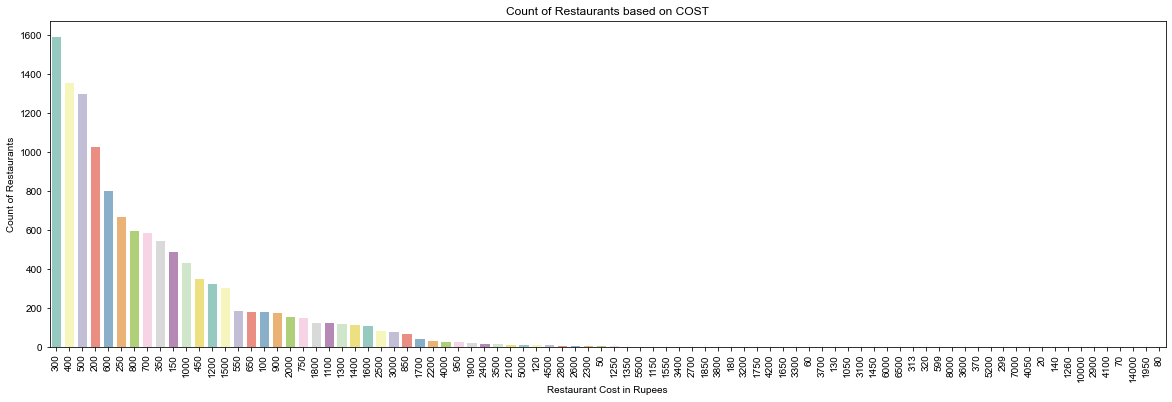

In [21]:
#Checking out the COST details on Restaurant count basis and plotting it
print(df_train['COST'].value_counts())
print('\n')
plt.subplots(figsize=(20,6))
sns.set(style='whitegrid')
sns.countplot(x='COST',data=df_train,palette='Set3',order=df_train['COST'].value_counts().index)
plt.title('Count of Restaurants based on COST')
plt.xlabel('Restaurant Cost in Rupees')
plt.ylabel('Count of Restaurants')
plt.xticks(rotation=90)
plt.show()

Observations:

-> We can see that the maximum cost by the restaurant is Rs 14000 which is given by 1 restaurant. 

-> The minimum cost by the restaurant is Rs 20 which is given by 1 restaurant. 

-> We can observe that the maximum restaurant cost is Rs 300 which are given by 1595 restaurants.

QUICK BITES             4218
CASUAL DINING           3652
None                    1003
CAFÉ                     607
DESSERT PARLOR           382
                        ... 
BAKERY,CONFECTIONERY       1
CLUB,MICROBREWERY          1
MICROBREWERY,LOUNGE        1
PUB,CAFÉ                   1
BAR,CLUB                   1
Name: TITLE, Length: 113, dtype: int64




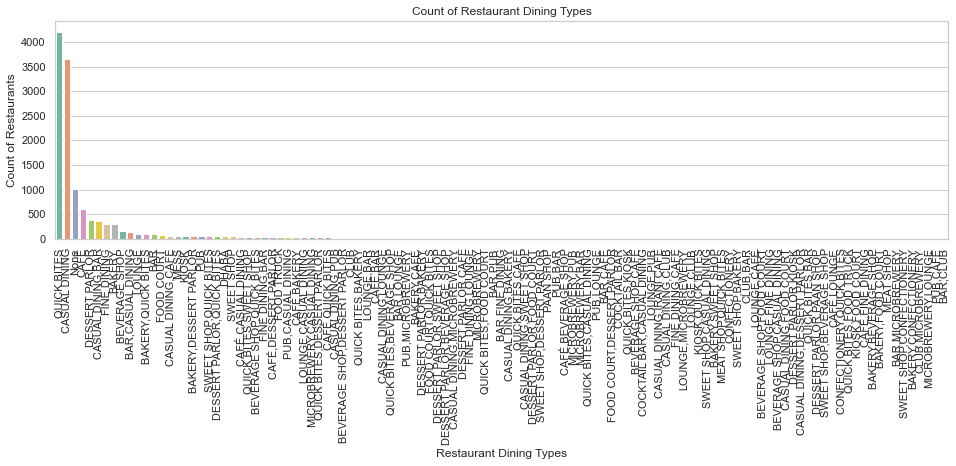

In [22]:
#Checking the Dining Types in Restaurants and plotting it
print(df_train['TITLE'].value_counts())
print('\n')
plt.subplots(figsize=(16,4))
sns.countplot(x='TITLE',data=df_train,palette='Set2',order= df_train['TITLE'].value_counts().index)
plt.title('Count of Restaurant Dining Types')
plt.xlabel('Restaurant Dining Types')
plt.ylabel('Count of Restaurants')
plt.xticks(rotation=90)
plt.show()

-> Maximum number of restaurants have QUICK BYTES and its value is 4218.

-> Minimum number of restaurants have MEAT SHOP,  MICROBREWERY,LOUNGE,  KIOSK,FOOD COURT,  QUICKBITES,BAR and BAR,MICROBREWERY 
   where only 1 restaurant have these.

3.9    2442
3.8    1190
4.0    1099
3.7    1086
3.6     951
4.1     936
3.5     771
4.2     723
3.4     575
4.3     556
3.3     365
4.4     362
3.2     266
4.5     199
2.9     186
3.1     186
3.0     170
2.8     146
4.6     141
2.7      89
4.7      69
2.6      61
2.5      35
4.8      32
4.9      22
2.4      15
2.3      10
2.1       3
2.2       2
2.0       2
Name: RATING, dtype: int64




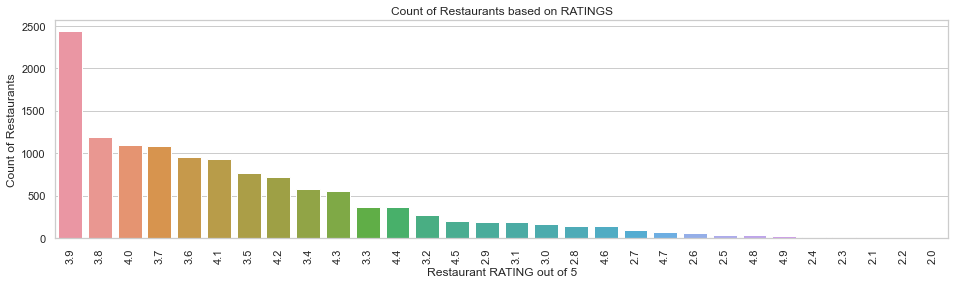

In [23]:
#Checking the count of Restaurants on RATING basis and plotting
print(df_train['RATING'].value_counts())
print('\n')
plt.subplots(figsize=(16,4))
sns.set(style='darkgrid')
sns.countplot(x='RATING',data=df_train,order= df_train['RATING'].value_counts().index)
plt.title('Count of Restaurants based on RATINGS')
plt.xlabel('Restaurant RATING out of 5')
plt.ylabel('Count of Restaurants')
plt.xticks(rotation=90)
plt.show()

-> Maximum ratings are 3.9 and it has been given to 2442 restaurants.

-> Minimum ratings are 2.0 and 2.2. It's been given to 2 restaurants each.

# Bivariate Analysis

RATING
4.5    1197.738693
4.6    1193.617021
4.7    1184.782609
4.4    1183.066298
4.9    1120.454545
4.3    1096.780576
4.2    1043.983402
4.8    1032.812500
2.1     916.666667
4.1     890.117521
4.0     794.822566
2.0     700.000000
2.4     653.333333
2.2     650.000000
2.6     572.131148
3.8     558.007563
2.5     554.285714
3.9     533.554464
3.7     523.139963
2.7     494.494382
2.3     485.000000
3.6     481.093586
2.9     478.817204
3.0     450.588235
3.5     449.909209
2.8     446.506849
3.4     423.513043
3.2     419.169173
3.3     411.816438
3.1     405.483871
Name: COST, dtype: float64




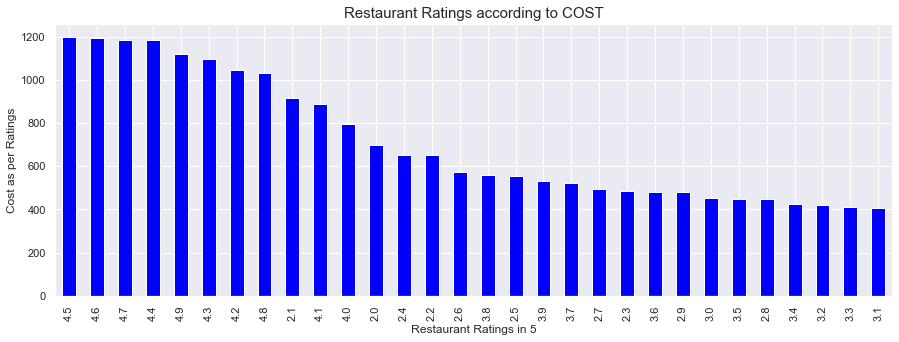

In [24]:
#Checking RATING vs COST relationship
print(df_train.groupby('RATING')['COST'].mean().sort_values(ascending=False))
print('\n')
plt.subplots(figsize=(18,4))
df_train.groupby('RATING')['COST'].mean().sort_values(ascending=False).plot(kind="bar",figsize=(15,5),color='blue')
plt.title("Restaurant Ratings according to COST", fontsize=15)
plt.xlabel('Restaurant Ratings in 5')
plt.ylabel('Cost as per Ratings')
plt.show()

Observations:

-> The restaurants which got 4.5 as rating have the maximum cost and it's mean value is 1197.7.

-> The restaurants which got 3.1 as rating have the minimum cost and it's mean value is 405.4.

TITLE
FINE DINING                   2958.928571
COCKTAIL BAR,CASUAL DINING    2833.333333
FINE DINING,BAR               2825.000000
CLUB                          2555.000000
FINE DINING,LOUNGE            2550.000000
                                 ...     
KIOSK,QUICK BITES              150.000000
BEVERAGE SHOP,FOOD COURT       150.000000
DESSERT PARLOR,PAAN SHOP       150.000000
PAAN SHOP                      112.500000
SWEET SHOP,BAKERY              100.000000
Name: COST, Length: 113, dtype: float64




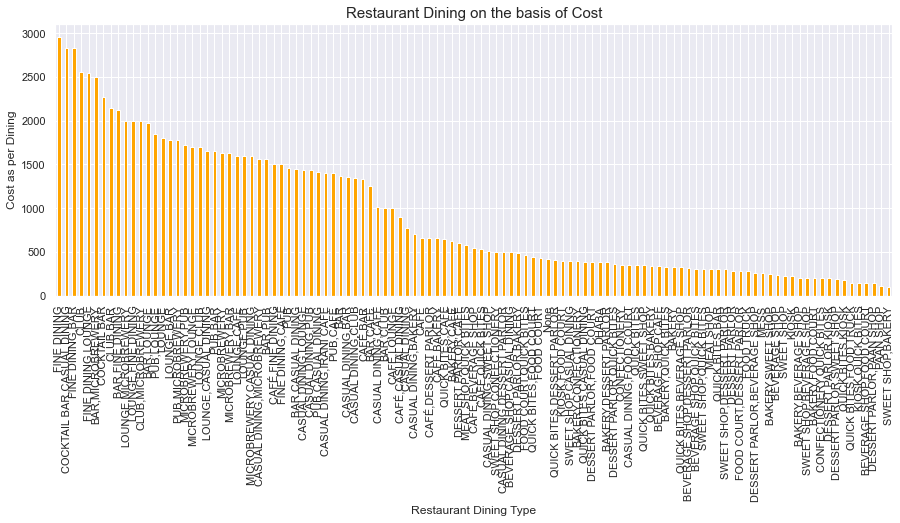

In [25]:
#Checking the COST on the basis of restaurant dining types
print(df_train.groupby('TITLE')['COST'].mean().sort_values(ascending=False))
print('\n')
plt.subplots(figsize=(18,4))
df_train.groupby('TITLE')['COST'].mean().sort_values(ascending=False).plot(kind="bar",figsize=(15,5),color='orange')
plt.title("Restaurant Dining on the basis of Cost", fontsize=15)
plt.xlabel('Restaurant Dining Type')
plt.ylabel('Cost as per Dining')
plt.show()

Observations:

-> Maximum cost is given by FINE DINING restaurants and it is approx 2958.9 rupees.

-> Minimum cost is given by SWEET SHOP,BAKERY restaurants and it is approx 100 rupees.

TITLE
CASUAL DINING               2815080
QUICK BITES                 1464923
FINE DINING                  911350
CASUAL DINING,BAR            474949
None                         416800
                             ...   
BAKERY,FOOD COURT               200
BAKERY,BEVERAGE SHOP            200
QUICK BITES,FOOD TRUCK          150
BEVERAGE SHOP,FOOD COURT        150
DESSERT PARLOR,PAAN SHOP        150
Name: COST, Length: 113, dtype: int64




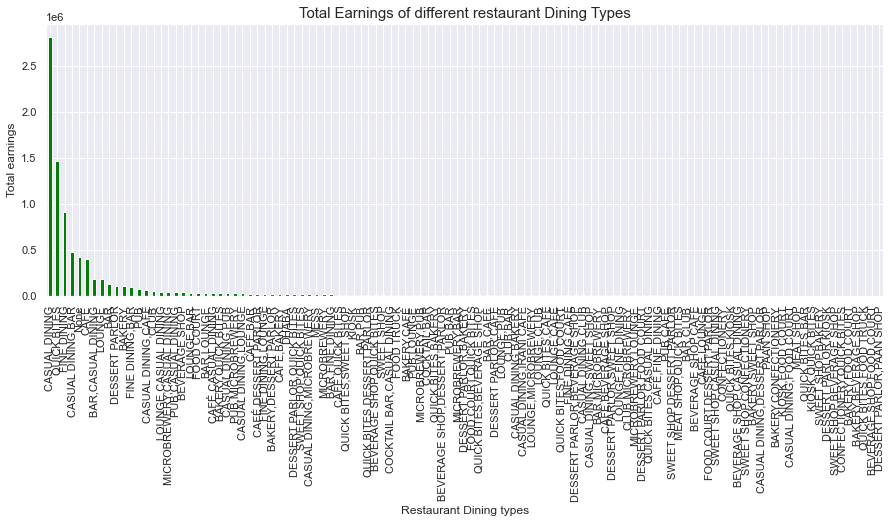

In [26]:
print(df_train.groupby('TITLE')['COST'].sum().sort_values(ascending=False))
print('\n')
plt.subplots(figsize=(18,4))
df_train.groupby('TITLE')['COST'].sum().sort_values(ascending=False).plot(kind="bar",figsize=(15,5),color='green')
plt.title("Total Earnings of different restaurant Dining Types", fontsize=15)
plt.xlabel('Restaurant Dining types')
plt.ylabel('Total earnings')
plt.show()

Maximum earnings are earned by CASUAL DINING restaurants whereas minimum earnings are earned by DESSERT PARLOUR, PAAN SHOP.

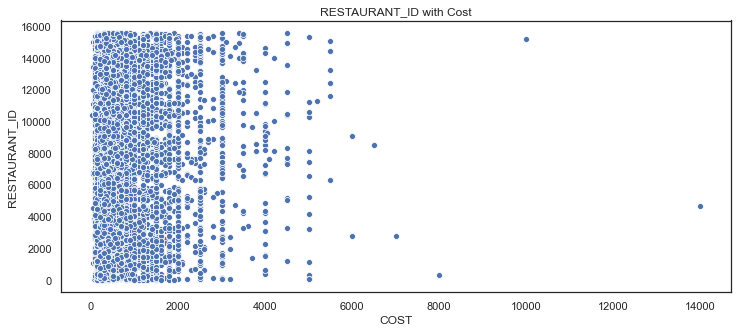

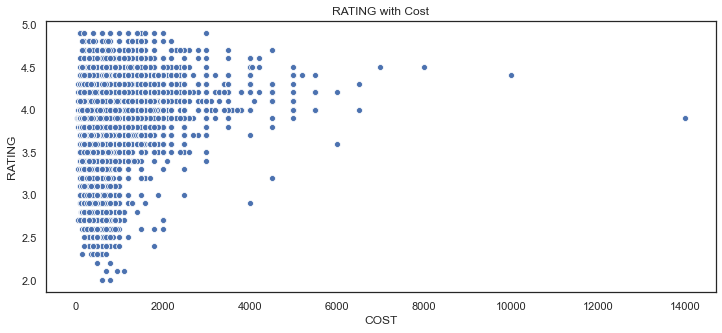

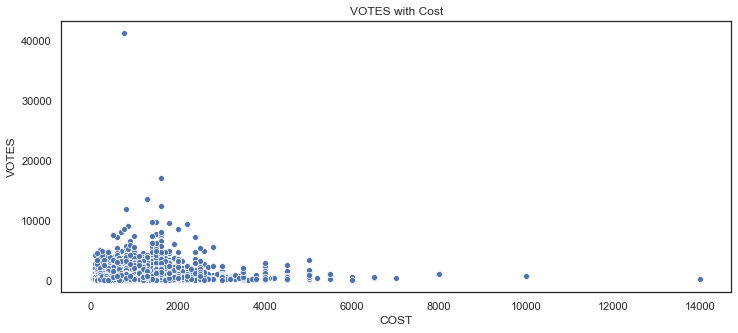

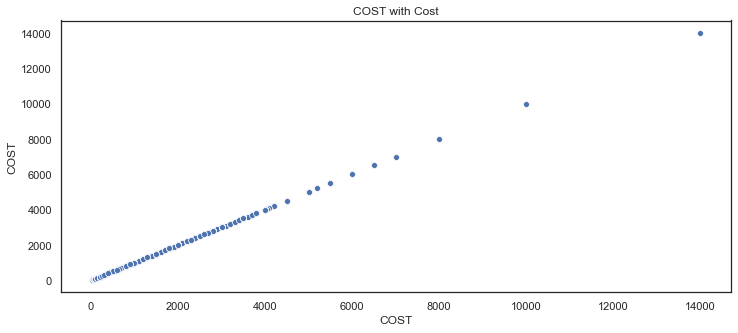

In [27]:
#Scatter plot with target variable COST
for i in df_train.columns:
    if df_train[i].dtypes!='O':
        sns.set(style='white')
        plt.figure(figsize=(12,5))
        plt.title(str(i)+' with '+'Cost')
        sns.scatterplot(x=df_train['COST'], y=df_train[i], data=df_train)
        plt.show()

# Converting categorical data into numeric data

In [28]:
df_train.dtypes   #Checking datatypes

TITLE             object
RESTAURANT_ID      int64
CUISINES          object
TIME              object
CITY              object
LOCALITY          object
RATING           float64
VOTES            float64
COST               int64
dtype: object

There are some columns having categorical data and we need to convert them into numeric. It can be done by using LabelEncoder

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
col=['TITLE','CUISINES','TIME','CITY','LOCALITY']  #columns to be converted
for i in col:
    df_train[i] = le.fit_transform(df_train[i])

In [30]:
df_train   #Checking the dataset after conversion

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,31,9438,2627,739,320,285,3.6,49.0,1200
1,33,13198,289,1885,67,1047,4.2,30.0,1500
2,31,10915,2976,661,67,1102,3.8,221.0,800
3,95,6346,4130,275,222,136,4.1,24.0,800
4,50,15387,1766,615,222,621,3.8,165.0,300
...,...,...,...,...,...,...,...,...,...
12685,95,13228,2934,1144,131,342,3.8,546.0,500
12686,33,9686,2143,1177,222,133,4.3,1214.0,1800
12687,71,11133,2088,1137,239,1343,4.0,608.0,1300
12688,31,6134,3506,1837,67,632,3.5,32.0,400


In [31]:
#Dropping restaurant ID as it is not important
df_train.drop('RESTAURANT_ID',axis=1,inplace=True)

Now all the columns have numeric data and we can proceed further with analysis

# Multivariate Analysis

In [32]:
df_train.describe()    #Statistical summary of the dataset

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
count,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000
mean,59.465721,2235.193932,1180.084003,144.557920,661.138692,3.796320,415.668901,655.252246
std,32.762427,1204.091664,754.459944,85.671273,403.907857,0.402966,801.745630,627.003540
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000,20.000000
25%,31.000000,1185.250000,555.000000,67.000000,337.000000,3.600000,64.000000,300.000000
50%,59.000000,2416.500000,1123.000000,131.000000,591.000000,3.900000,200.000000,500.000000
75%,95.000000,3222.750000,1847.000000,222.000000,1012.000000,4.000000,415.668901,800.000000
max,112.000000,4154.000000,2688.000000,359.000000,1417.000000,4.900000,41186.000000,14000.000000


Observations:

1.There is not much difference between the mean and the median

2.The minimum value is 0 for all other columns except Rating, Votes and Cost.

3.The 75th percentile and max value difference for Votes and Cost columns are high and it is due to the presence of outliers.

In [33]:
#Checking correlation of the dataset
corr=df_train.corr()  #corr() function provides the correlation value of each column
corr

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
TITLE,1.000000,0.244866,0.053914,-0.001150,0.038071,-0.148461,-0.126840,-0.263581
CUISINES,0.244866,1.000000,0.104741,0.022411,0.015573,-0.062395,-0.036067,-0.014078
TIME,0.053914,0.104741,1.000000,-0.007677,-0.005506,0.050713,-0.010247,0.018248
CITY,-0.001150,0.022411,-0.007677,1.000000,0.071383,0.068513,0.048850,0.039322
LOCALITY,0.038071,0.015573,-0.005506,0.071383,1.000000,-0.018630,-0.030927,-0.018257
RATING,-0.148461,-0.062395,0.050713,0.068513,-0.018630,1.000000,0.346739,0.308018
VOTES,-0.126840,-0.036067,-0.010247,0.048850,-0.030927,0.346739,1.000000,0.240241
COST,-0.263581,-0.014078,0.018248,0.039322,-0.018257,0.308018,0.240241,1.000000


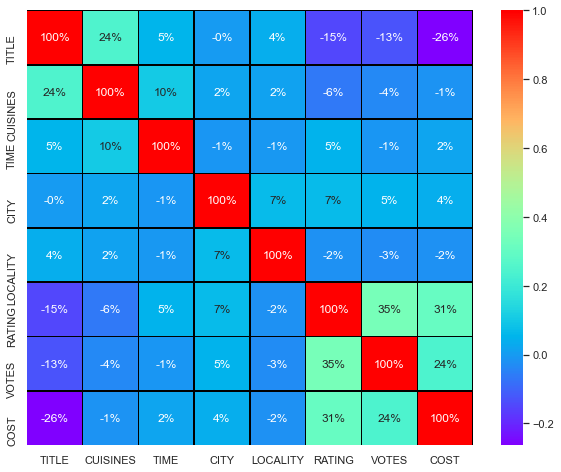

In [34]:
#Plotting heatmap for visualizing the correlation
plt.figure(figsize=(10,8))
sns.heatmap(corr,linewidth=0.5,linecolor='black',fmt='.0%',cmap='rainbow',annot=True)
plt.show()

Observations:

1.There are more postive correlations present in the dataset

2.Highest positive correlated column is Votes with Rating and has a value of 35%.

3.Highest negatively correlated column is Title with Cost and it has a value of -26%

4.Positively correlated columns have a high impact with the target variable whereas negatively correlated columns have less or zero impact with the target variable.

# Checking skewness

In [35]:
df_train.skew()

TITLE       -0.069803
CUISINES    -0.218782
TIME         0.306186
CITY         0.292433
LOCALITY     0.332539
RATING      -0.610531
VOTES       14.890494
COST         3.978801
dtype: float64

Large skewness is present in Votes and Cost columns

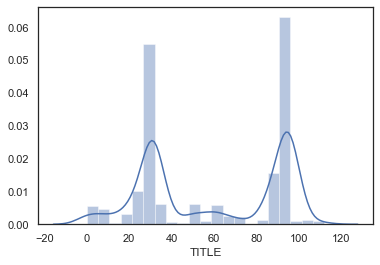

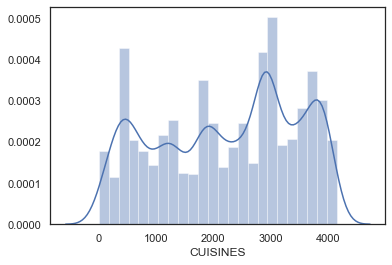

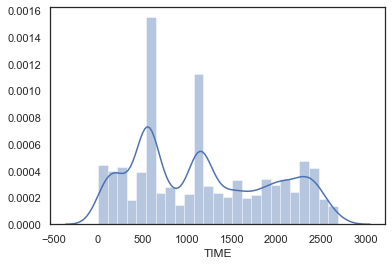

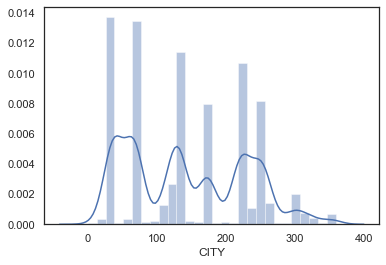

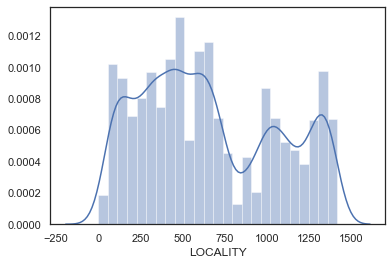

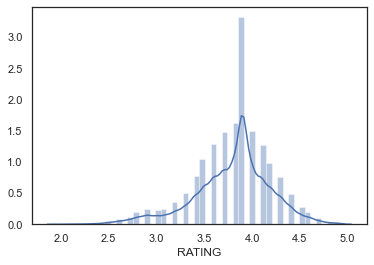

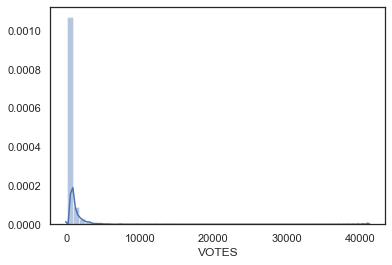

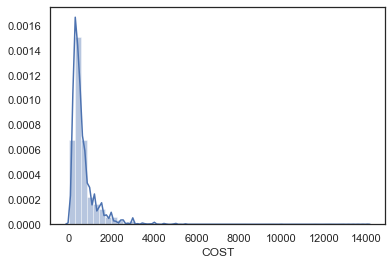

In [36]:
#Plotting distplot for checking the distribution of skewness
for col in df_train.describe().columns:
    sns.distplot(df_train[col])
    plt.show()

We can see that all the features are not normally distributed and it is due to the presence of outliers

# Checking outliers

We can check outliers by plotting boxplot

In [37]:
collist=df_train.columns.values 
ncol=10
nrows=10

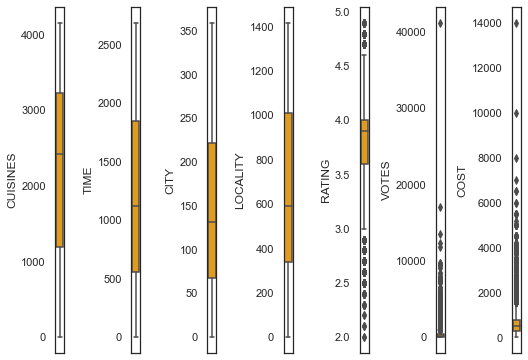

In [38]:
#Lets visualize outliers through boxplots
plt.figure(figsize=(ncol,5*ncol))
for i in range (1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df_train[collist[i]],color='orange',orient='v')
    plt.tight_layout()

There are large outliers in Rating, Votes and Cost. It can be handled by using z-score method

# Handling outliers by using z-score method 

In [39]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df_train))   #converting all values into absolute values
threshold=3    #setting up a threshold
np.where(z>3)

(array([   84,   159,   186,   196,   208,   293,   303,   304,   308,
          337,   344,   354,   379,   422,   431,   469,   502,   510,
          563,   599,   672,   731,   775,   796,   839,   852,   855,
          872,   913,   966,   967,   973,  1008,  1020,  1034,  1038,
         1132,  1133,  1147,  1151,  1193,  1244,  1288,  1345,  1346,
         1395,  1467,  1470,  1475,  1476,  1522,  1540,  1594,  1617,
         1632,  1657,  1681,  1685,  1759,  1773,  1778,  1816,  1828,
         1850,  1878,  1884,  1916,  1930,  1931,  1973,  2068,  2090,
         2100,  2111,  2188,  2204,  2205,  2207,  2268,  2302,  2305,
         2333,  2339,  2349,  2369,  2459,  2488,  2531,  2604,  2610,
         2622,  2683,  2686,  2689,  2695,  2740,  2778,  2886,  2905,
         2921,  2940,  2969,  2973,  2977,  3002,  3028,  3033,  3036,
         3049,  3170,  3197,  3206,  3211,  3289,  3309,  3333,  3338,
         3396,  3397,  3398,  3408,  3483,  3491,  3492,  3507,  3526,
      

In [40]:
#Removing outliers
df_newtrain=df_train[(z<3).all(axis=1)]
df_newtrain

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,31,2627,739,320,285,3.6,49.0,1200
1,33,289,1885,67,1047,4.2,30.0,1500
2,31,2976,661,67,1102,3.8,221.0,800
3,95,4130,275,222,136,4.1,24.0,800
4,50,1766,615,222,621,3.8,165.0,300
...,...,...,...,...,...,...,...,...
12685,95,2934,1144,131,342,3.8,546.0,500
12686,33,2143,1177,222,133,4.3,1214.0,1800
12687,71,2088,1137,239,1343,4.0,608.0,1300
12688,31,3506,1837,67,632,3.5,32.0,400


In [41]:
df_train.shape   #Original dataset dimensions

(12690, 8)

In [42]:
df_newtrain.shape    #New dataset dimensions

(12202, 8)

Nearly 400+ rows of data had outliers and they had been handled by using z-score method

# Percentage loss of data after removal of outliers

In [43]:
percentage_loss=((488)/12690)*100   #488 = 12690-12202
print(percentage_loss)

3.8455476753349096


Nearly 3.8% of data has lost which is not a big loss

# Preparing dataset for model training

We need to split independent and dependent variables from the dataset in order to perform further analysis

In [44]:
df_x=df_newtrain.drop('COST',axis=1)   #Independent variables
y=df_newtrain['COST']    #Dependent or Target Variable

In [45]:
#Checking x data
df_x.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,31,2627,739,320,285,3.6,49.0
1,33,289,1885,67,1047,4.2,30.0
2,31,2976,661,67,1102,3.8,221.0
3,95,4130,275,222,136,4.1,24.0
4,50,1766,615,222,621,3.8,165.0


In [46]:
#Checking y data after splitting
y.head()

0    1200
1    1500
2     800
3     800
4     300
Name: COST, dtype: int64

# Treating skewness

In [47]:
#We are treating skewness by using square root transform
for col in df_x.skew().index:
    if col in df_x.describe().columns:
        if df_x[col].skew()>0.55:
            df_x[col]=np.sqrt(df_x[col])

In [48]:
df_x.skew()   #Checking skewness after treating it

TITLE      -0.084036
CUISINES   -0.214230
TIME        0.315042
CITY        0.306495
LOCALITY    0.330213
RATING     -0.510384
VOTES       1.074275
dtype: float64

We can see that skewness has been treated and we can proceed further analysis

# Scaling the data 

Sometimes model can be biased to higher values in dataset, so it is better to scale the dataset so that we can bring all the columns in common range. We can use StandardScaler here.

In [49]:
#Scaling the dataset using StandardScaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,-0.868876,0.325378,-0.574803,2.053073,-0.930763,-0.490631,-0.885857
1,-0.808367,-1.609452,0.935767,-0.903499,0.952835,1.064552,-1.040132
2,-0.868876,0.614196,-0.677617,-0.903499,1.088790,0.027764,-0.088931
3,1.067418,1.569198,-1.186413,0.907839,-1.299078,0.805355,-1.098715
4,-0.294039,-0.387149,-0.738251,0.907839,-0.100200,0.027764,-0.293665
...,...,...,...,...,...,...,...
12197,1.067418,0.579439,-0.040963,-0.155592,-0.789864,0.027764,0.772278
12198,-0.808367,-0.075160,0.002535,0.907839,-1.306494,1.323749,1.934919
12199,0.341308,-0.120675,-0.050190,1.106502,1.684521,0.546158,0.903073
12200,-0.868876,1.052802,0.872497,-0.903499,-0.073009,-0.749828,-1.021933


# Building the model

In [50]:
#Importing required metrices and model for the dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [51]:
#Finding the best random state and accuracy
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print('At random state',i,',the model performs well')
        print('Training r2_score is: ',r2_score(y_train,pred_train)*100)
        print('Testing r2_score is: ',r2_score(y_test,pred_test)*100)

At random state 155 ,the model performs well
Training r2_score is:  25.0111797620864
Testing r2_score is:  24.987699547308505
At random state 157 ,the model performs well
Training r2_score is:  25.023394218273165
Testing r2_score is:  25.01385943735923
At random state 162 ,the model performs well
Training r2_score is:  25.016518760947037
Testing r2_score is:  25.043568630060776
At random state 191 ,the model performs well
Training r2_score is:  25.008689659325544
Testing r2_score is:  24.987484404450633
At random state 221 ,the model performs well
Training r2_score is:  25.002084535140757
Testing r2_score is:  25.049104723458814
At random state 234 ,the model performs well
Training r2_score is:  25.003174530128536
Testing r2_score is:  25.03906204229581
At random state 247 ,the model performs well
Training r2_score is:  25.031640206206994
Testing r2_score is:  24.964545939808513
At random state 261 ,the model performs well
Training r2_score is:  25.00698767109314
Testing r2_score is:  

We can see that at random_state=162, the best r2_score is obtained so that we can create our train_test_split with this random state

In [52]:
#Creating train_test_split using best random_state
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=162,test_size=.20)

# Finding the best model

In [53]:
#Importing required metrices and model for the dataset
from sklearn.linear_model import LinearRegression,Lasso,ElasticNet,Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [54]:
LR=LinearRegression()
l=Lasso()
en=ElasticNet()
rd=Ridge()
svr=SVR()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()

In [55]:
models= []
models.append(('Linear Regression',LR))
models.append(('Lasso Regression',l))
models.append(('Elastic Net Regression',en))
models.append(('Ridge Regression',rd))
models.append(('Support Vector Regressor',svr))
models.append(('Decision Tree Regressor',dtr))
models.append(('KNeighbors Regressor',knr))

In [56]:
#Importing required metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

In [57]:
#Finding the required metrices for all models together using a for loop
Model=[]
score=[]
cvs=[]
sd=[]
mae=[]
mse=[]
rmse=[]
for name,model in models:
    print('******************************',name,'***************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=r2_score(y_test,pre)
    print('r2_score: ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=5,scoring='r2').mean()
    print('cross_val_score: ',sc)
    cvs.append(sc*100)
    print('\n')
    std=cross_val_score(model,x,y,cv=5,scoring='r2').std()
    print('Standard Deviation: ',std)
    sd.append(std)
    print('\n')
    MAE=mean_absolute_error(y_test,pre)
    print('Mean Absolute Error: ',MAE)
    mae.append(MAE)
    print('\n')
    MSE=mean_squared_error(y_test,pre)
    print('Mean Squared Error: ',MSE)
    mse.append(MSE)
    print('\n')
    RMSE=np.sqrt(mean_squared_error(y_test,pre))
    print('Root Mean Squared Error: ',RMSE)
    rmse.append(RMSE)
    print('\n\n')

****************************** Linear Regression ***************************


LinearRegression()


r2_score:  0.25043568630060775


cross_val_score:  0.24875601748845258


Standard Deviation:  0.0091098418603867


Mean Absolute Error:  264.51655089365363


Mean Squared Error:  146911.74961895647


Root Mean Squared Error:  383.29068553639087



****************************** Lasso Regression ***************************


Lasso()


r2_score:  0.25056474787208083


cross_val_score:  0.24875420116327387


Standard Deviation:  0.009208201842171828


Mean Absolute Error:  264.30507988037044


Mean Squared Error:  146886.45404267684


Root Mean Squared Error:  383.25768621474094



****************************** Elastic Net Regression ***************************


ElasticNet()


r2_score:  0.23382862494344625


cross_val_score:  0.23078884701364508


Standard Deviation:  0.007983098928182258


Mean Absolute Error:  268.08998777264566


Mean Squared Error:  150166.67037147834


Root Mean Squ

In [58]:
#Finalizing the result
result=pd.DataFrame({'Model':Model, 'r2_score': score, 'Cross_val_score':cvs, 'Standard_deviation':sd,
                    'Mean_absolute_error':mae, 'Mean_squared_error':mse, 'Root_Mean_Squared_error':rmse})
result

,Model,r2_score,Cross_val_score,Standard_deviation,Mean_absolute_error,Mean_squared_error,Root_Mean_Squared_error
0,Linear Regression,25.043569,24.875602,0.009110,264.516551,146911.749619,383.290686
1,Lasso Regression,25.056475,24.875420,0.009208,264.305080,146886.454043,383.257686
2,Elastic Net Regression,23.382862,23.078885,0.007983,268.089988,150166.670371,387.513445
3,Ridge Regression,25.043637,24.875616,0.009109,264.515720,146911.615902,383.290511
4,Support Vector Regressor,16.658443,16.202438,0.014472,253.361059,163346.277072,404.161202
5,Decision Tree Regressor,38.984133,40.198258,0.052234,230.659975,119588.775502,345.816101
6,KNeighbors Regressor,40.489789,38.704821,0.017145,225.955264,116637.745645,341.522687


We can see that Decision Tree Regressor and KNeighbors Regressor are performing well compared to other algorithms. Now we will try Hyperparameter Tuning to find out the best parameters and try to increase the scores.

# Hyperparameter Tuning

Decision Tree Regressor

In [59]:
#Creating parameter list to pass in GridSearchCV
parameters={'criterion':['mse','mae'],'random_state':range(0,10),'max_features':['auto','sqrt','log2']}

In [60]:
#Using GridSearchCV to run the parameters and checking final r2_score
from sklearn.model_selection import GridSearchCV
dtr=DecisionTreeRegressor()
grid=GridSearchCV(dtr,parameters,cv=5,scoring='r2')
grid.fit(x_train,y_train)
print(grid.best_params_)  #Printing the best parameters obtained
print(grid.best_score_) #Mean cross-validated score of best_estimator

{'criterion': 'mse', 'max_features': 'auto', 'random_state': 7}
0.3751868487600528


In [61]:
#Using the best parameters obtained
dtr=DecisionTreeRegressor(criterion='mse', random_state=7, max_features='auto')
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)
print('Final r2_score after tuning is: ',r2_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(dtr,x,y,cv=5,scoring='r2').mean()*100)
print('Standard deviation: ',cross_val_score(dtr,x,y,cv=5,scoring='r2').std())
print('\n')
print('Mean absolute error: ',mean_absolute_error(y_test,pred))
print('Mean squared error: ',mean_squared_error(y_test,pred))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred)))

Final r2_score after tuning is:  39.314256253047894
Cross validation score:  39.66045181451594
Standard deviation:  0.053433916305023


Mean absolute error:  231.24170421958215
Mean squared error:  118941.74559606718
Root Mean squared error:  344.87932033693636


KNeighbors Regressor

In [62]:
#Creating parameter list to pass in GridSearchCV
parameters={'n_neighbors':(1,10),'weights':['uniform','distance'],'algorithm':['auto','ball_tree','brute','kd_tree']}

In [63]:
#Using GridSearchCV to run the parameters and checking final r2_score
from sklearn.model_selection import GridSearchCV
knr=KNeighborsRegressor()
grid=GridSearchCV(knr,parameters,cv=5,scoring='r2')
grid.fit(x_train,y_train)
print(grid.best_params_)  #Printing the best parameters obtained
print(grid.best_score_) #Mean cross-validated score of best_estimator

{'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}
0.4114226331157328


In [64]:
#Using the best parameters obtained
knr=KNeighborsRegressor(algorithm='auto', n_neighbors=10, weights='distance')
knr.fit(x_train,y_train)
pred=knr.predict(x_test)
print('Final r2_score after tuning is: ',r2_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(knr,x,y,cv=5,scoring='r2').mean()*100)
print('Standard deviation: ',cross_val_score(knr,x,y,cv=5,scoring='r2').std())
print('\n')
print('Mean absolute error: ',mean_absolute_error(y_test,pred))
print('Mean squared error: ',mean_squared_error(y_test,pred))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred)))

Final r2_score after tuning is:  43.68388762280679
Cross validation score:  42.69732540486512
Standard deviation:  0.008692848040249779


Mean absolute error:  221.50220118125338
Mean squared error:  110377.43459581582
Root Mean squared error:  332.2309958384615


After applying Hyperparameter Tuning, we can see that KNeighborsRegressor is the best performing algorithm as it got the best parameters and after applying that our scores got increased, i.e, r2_score from 40.48 to 43.68 and cross_val_score from 38.70 to 42.69 which is good. We will try Ensemble techniques like RandomForestRegressor, AdaBoostRegressor and GradientBoostingRegressor to boost up our scores.

# Ensemble Techniques for boosting our scores

In [65]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=162)   #Using the best random state we obtained
parameters={'n_estimators':[10,50,100,500]}
grid=GridSearchCV(rfr,parameters,cv=5,scoring='r2')
grid.fit(x_train,y_train)
print(grid.best_params_)  #Printing the best parameters obtained
print(grid.best_score_) #Mean cross-validated score of best_estimator

{'n_estimators': 500}
0.6840897553784016


In [66]:
#Using the best parameters obtained
RF=RandomForestRegressor(random_state=162, n_estimators=500)
RF.fit(x_train,y_train)
pred=RF.predict(x_test)
print('r2_score: ',r2_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(RF,x,y,cv=5,scoring='r2').mean()*100)
print('Standard deviation: ',cross_val_score(RF,x,y,cv=5,scoring='r2').std())
print('\n')
print('Mean absolute error: ',mean_absolute_error(y_test,pred))
print('Mean squared error: ',mean_squared_error(y_test,pred))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred)))

r2_score:  68.54485449843098
Cross validation score:  68.78496098715081
Standard deviation:  0.02181386685405332


Mean absolute error:  169.62476994206122
Mean squared error:  61650.88673108345
Root Mean squared error:  248.29596599840974


In [67]:
#AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
adr=AdaBoostRegressor(random_state=162)   #Using the best random state we obtained
parameters={'n_estimators':[10,50,100,500],'learning_rate':[0.001,0.01,0.1,1],'loss':['linear','square']}
grid=GridSearchCV(adr,parameters,cv=5,scoring='r2')
grid.fit(x_train,y_train)
print(grid.best_params_)  #Printing the best parameters obtained
print(grid.best_score_) #Mean cross-validated score of best_estimator

{'learning_rate': 0.01, 'loss': 'square', 'n_estimators': 100}
0.392814121614394


In [68]:
#Using the best parameters obtained
adr=AdaBoostRegressor(random_state=162, n_estimators=100, learning_rate=0.01, loss='square')
adr.fit(x_train,y_train)
pred=adr.predict(x_test)
print("r2_score: ",r2_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(adr,x,y,cv=5,scoring='r2').mean()*100)
print('Standard deviation: ',cross_val_score(adr,x,y,cv=5,scoring='r2').std())
print('\n')
print('Mean absolute error: ',mean_absolute_error(y_test,pred))
print('Mean squared error: ',mean_squared_error(y_test,pred))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred)))

r2_score:  41.0359575482566
Cross validation score:  40.33056737514266
Standard deviation:  0.024393809285434102


Mean absolute error:  245.8088252537767
Mean squared error:  115567.27665487672
Root Mean squared error:  339.9518740275993


In [69]:
#GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(random_state=162)   #Using the best random state we obtained
parameters={'n_estimators':[10,50,100,500],'learning_rate':[0.001,0.01,0.1,1],'loss':['ls','lad','huber']}
grid=GridSearchCV(gbr,parameters,cv=5,scoring='r2')
grid.fit(x_train,y_train)
print(grid.best_params_)  #Printing the best parameters obtained
print(grid.best_score_) #Mean cross-validated score of best_estimator

{'learning_rate': 0.1, 'loss': 'ls', 'n_estimators': 500}
0.7186586134722076


In [70]:
#Using the best parameters obtained
gbr=GradientBoostingRegressor(random_state=162, n_estimators=500, learning_rate=0.1, loss='ls')
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
print("r2_score: ",r2_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(gbr,x,y,cv=5,scoring='r2').mean()*100)
print('Standard deviation: ',cross_val_score(gbr,x,y,cv=5,scoring='r2').std())
print('\n')
print('Mean absolute error: ',mean_absolute_error(y_test,pred))
print('Mean squared error: ',mean_squared_error(y_test,pred))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred)))

r2_score:  71.8705647136638
Cross validation score:  72.27096802959845
Standard deviation:  0.014729388305961644


Mean absolute error:  163.54311408250828
Mean squared error:  55132.621419943855
Root Mean squared error:  234.803367565169


After applying Ensemble Techniques, we can see that GradientBoostingRegressor is the best performing algorithm among all other algorithms as it is giving a r2_score of 71.87 and cross validation score of 72.27. It has also the less amount of error values obtained. Lesser the RMSE score, the better the model. Now we will finalize the model.

# Finalizing the model

In [71]:
gbr_prediction=gbr.predict(x)
print('Predictions of GradientBoosting Regressor: ',gbr_prediction)   #Printing the predicted values

Predictions of GradientBoosting Regressor:  [ 626.14124659 1638.29348248  699.22611617 ... 1545.73984526  568.84881482
  693.11297046]


In [72]:
#Saving the model
import pickle
filename='RestaurantCost_Project.pkl'   #Specifying the filename
pickle.dump(gbr,open(filename,'wb'))   

# Saving the predicted values

In [73]:
train_results=pd.DataFrame(gbr_prediction)
train_results.to_csv('RestaurantCost_Project_TrainDataResults.csv')

Now, we have saved the model which has the predictions of the training data we had used. Next, we will use the test data and find the predictions using the trained data we have

# Using the test dataset

In [74]:
df_test=pd.read_csv('D:/Python file/Project Datasets/FinalEval/Restaurant/Data_Test.csv')  #Path location of the dataset
df_test.head()  #Checking out the top 5 rows of the dataset

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [75]:
df_test.shape   #Checking out the dimensions of the dataset

(4231, 8)

In [76]:
df_test.isnull().sum()    #Checking for missing values

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

We can see that CITY, LOCALITY, RATING and VOTES have missing data and we need to handle it.

# Data pre-processing

In [77]:
#Now we will be checking the unique values in the dataset
for i in df_test.columns:
    print(df_test[i].value_counts())
    print('\n')

QUICK BITES                  1416
CASUAL DINING                1258
None                          284
CAFÉ                          223
DESSERT PARLOR                126
                             ... 
QUICK BITES,MEAT SHOP           1
FINE DINING,CAFÉ                1
LOUNGE,CLUB                     1
QUICK BITES,CASUAL DINING       1
FINE DINING,MICROBREWERY        1
Name: TITLE, Length: 86, dtype: int64


12799    3
15454    3
4262     3
11169    3
1619     3
        ..
9598     1
11432    1
3451     1
5496     1
10241    1
Name: RESTAURANT_ID, Length: 4127, dtype: int64


North Indian, Chinese                          213
North Indian                                   190
South Indian                                   174
Fast Food                                       78
Chinese                                         59
                                              ... 
Desserts, Juices, Ice Cream                      1
South Indian, Chettinad                          1
Chinese

Observations:

-> The cuisines are of 1727 types.

-> The unique value of time is 1183.

-> The votes is 1136 unique types.

-> The locality is 1416 unique types.

-> 151 unique cities are mentioned.

-> 834 different localities are mentioned.

-> There are 4127 restaurant IDs.

-> Title of cuisines is of 86 different types.

-> Ratings is 32 different types.

Let's look the votes column. We need to remove the word votes and we need to fill the missing data and convert into float as there are null values. For filling the missing data, we will use fillna.

In [78]:
df_test['VOTES']=df_test['VOTES'].str.replace('votes','').astype(float) 
#We are replacing votes with blank and converting into int type

In [79]:
df_test['VOTES']=df_test['VOTES'].fillna(df_test['VOTES'].mean())
#Filling missing data with the mean value

In [80]:
#Checking if there are any missing values
print(df_test['VOTES'].isnull().sum())

0


We have handled the VOTES column. Let's check the RATING column. In some rows there are '-' and 'NEW' in the rating. We will replace it with missing data.

In [81]:
import numpy as np  #Using numpy library
df_test['RATING'] = df_test["RATING"].replace("-", np.NaN)
df_test['RATING'] = df_test["RATING"].replace("NEW", np.NaN)

In [82]:
#Checking for missing values after replacing - and NEW
print(df_test['RATING'].isnull().sum())

402


In [83]:
#Replacing the missing data with mode value using fillna
df_test['RATING'].fillna(df_test['RATING'].mode().values[0], inplace=True)

In [84]:
#Converting into float
df_test['RATING']=df_test['RATING'].astype(float)

In [85]:
#Checking if there are any missing values
print(df_test['RATING'].isnull().sum())

0


We have handled the RATING column. Let's check the CITY and LOCALITY column. We need to fill the missing data accordingly because sometimes it can mismatch the data and it will be a problem.

In [86]:
#Replacing NaN data with missing word in CITY and LOCALITY
df_test['CITY']=df_test['CITY'].fillna('missing')
df_test['LOCALITY']=df_test['LOCALITY'].fillna('missing')

In [87]:
df_test.isnull().sum()   #Checking for missing data after handling it

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
dtype: int64

We can see that all the missing data has been handled and we can proceed further with our analysis

In [88]:
df_test     #Checking the dataset

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564.000000
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61.000000
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350.000000
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445.000000
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23.000000
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287.000000
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469.000000
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53.000000
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,3.8,429.769391


# Exploratory Data Analysis

# Univariate Analysis

QUICK BITES                  1416
CASUAL DINING                1258
None                          284
CAFÉ                          223
DESSERT PARLOR                126
                             ... 
QUICK BITES,MEAT SHOP           1
FINE DINING,CAFÉ                1
LOUNGE,CLUB                     1
QUICK BITES,CASUAL DINING       1
FINE DINING,MICROBREWERY        1
Name: TITLE, Length: 86, dtype: int64




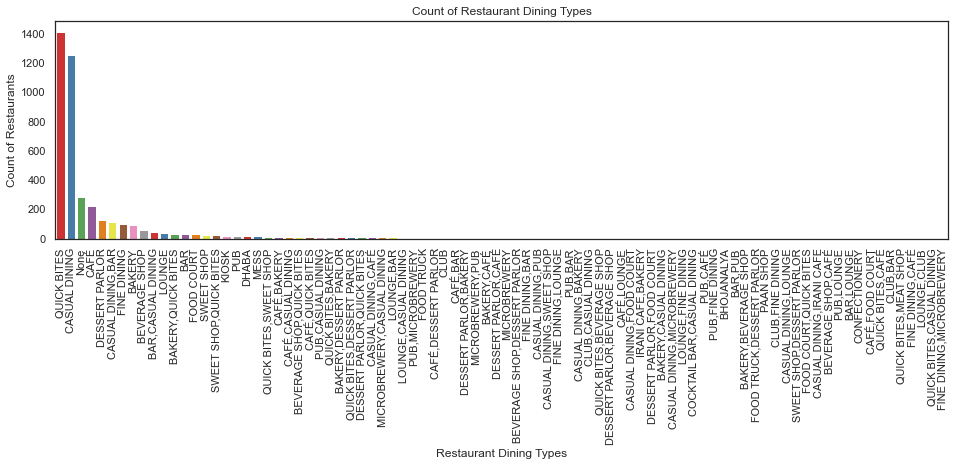

In [89]:
#Checking the Dining Types in Restaurants and plotting it
print(df_test['TITLE'].value_counts())
print('\n')
plt.subplots(figsize=(16,4))
sns.countplot(x='TITLE',data=df_test,palette='Set1',order= df_test['TITLE'].value_counts().index)
plt.title('Count of Restaurant Dining Types')
plt.xlabel('Restaurant Dining Types')
plt.ylabel('Count of Restaurants')
plt.xticks(rotation=90)
plt.show()

-> Maximum number of restaurants have QUICK BYTES and its value is 1416.

-> Minimum number of restaurants have PAAN SHOP, BAKERY, CASUAL DINING, LOUNGE, etc. where only 1 restaurant have these.

3.8    816
3.9    405
4.0    399
3.7    351
3.6    310
4.1    281
4.2    245
3.5    217
3.4    202
4.3    184
4.4    122
3.3    120
3.2     83
3.1     77
4.5     75
3.0     59
2.9     56
2.8     45
4.6     43
2.7     40
2.6     24
4.7     21
4.8     17
2.5     16
2.4      9
4.9      6
2.3      5
2.2      2
2.1      1
Name: RATING, dtype: int64




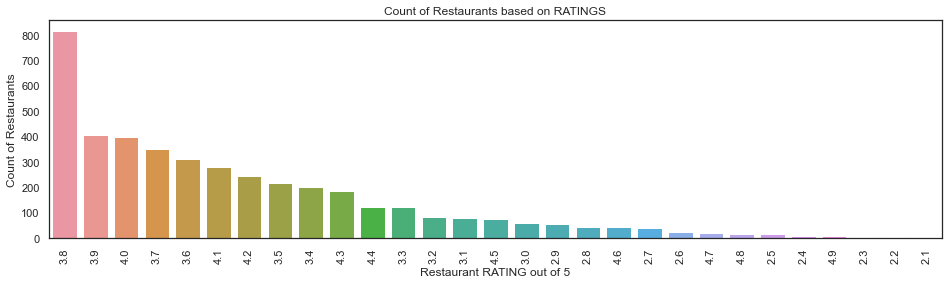

In [90]:
#Checking the count of Restaurants on RATING basis and plotting
print(df_test['RATING'].value_counts())
print('\n')
plt.subplots(figsize=(16,4))
sns.set(style='darkgrid')
sns.countplot(x='RATING',data=df_test,order= df_test['RATING'].value_counts().index)
plt.title('Count of Restaurants based on RATINGS')
plt.xlabel('Restaurant RATING out of 5')
plt.ylabel('Count of Restaurants')
plt.xticks(rotation=90)
plt.show()

-> Maximum ratings are 3.9 and it has been given to 816 restaurants.

-> Minimum ratings are 2.1 and 2.2. It's been given to 1 and 2 restaurants each.

# Converting categorical data into numeric data

In [91]:
df_test.dtypes   #Checking the datatypes

TITLE             object
RESTAURANT_ID      int64
CUISINES          object
TIME              object
CITY              object
LOCALITY          object
RATING           float64
VOTES            float64
dtype: object

There are some columns having categorical data and we need to convert them into numeric. It can be done by using LabelEncoder

In [92]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
col=['TITLE','CUISINES','TIME','CITY','LOCALITY']  #columns to be converted
for i in col:
    df_test[i] = le.fit_transform(df_test[i])

In [93]:
df_test   #Checking the dataset after conversion

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,23,4085,1293,503,110,662,4.3,564.000000
1,75,12680,1632,933,96,221,4.2,61.000000
2,23,1411,1455,219,96,411,3.8,350.000000
3,66,204,208,1071,41,456,3.8,1445.000000
4,75,13453,1637,208,78,300,3.6,23.000000
...,...,...,...,...,...,...,...,...
4226,23,9057,1425,103,108,597,3.9,287.000000
4227,66,1247,267,262,9,237,4.3,469.000000
4228,75,8617,679,1052,41,696,3.7,53.000000
4229,75,6485,1541,215,78,332,3.8,429.769391


In [94]:
#Dropping restaurant ID as it is not important
df_test.drop('RESTAURANT_ID',axis=1,inplace=True)

Now all the columns have numeric data and we can proceed further with analysis

# Multivariate Analysis

In [95]:
df_test.describe()    #Statistical summary of the dataset

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
count,4231.000000,4231.000000,4231.000000,4231.000000,4231.000000,4231.00000,4231.000000
mean,45.781612,928.372489,523.118884,59.445285,387.169936,3.78329,429.769391
std,26.409174,498.480193,340.539440,39.325072,237.765785,0.41233,790.961355
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.10000,3.000000
25%,23.000000,484.000000,242.000000,18.000000,192.000000,3.60000,66.000000
50%,42.000000,1008.000000,480.000000,55.000000,355.000000,3.80000,214.000000
75%,75.000000,1320.000000,840.500000,96.000000,588.000000,4.00000,429.769391
max,85.000000,1726.000000,1182.000000,151.000000,834.000000,4.90000,15205.000000


Observations:

1.There is not much difference between the mean and the median

2.The minimum value is 0 for all columns except Rating and Votes.

3.The 75th percentile and max value difference for Votes column is high and it is due to the presence of outliers.

In [96]:
#Checking correlation of the dataset
corr=df_test.corr()  #corr() function provides the correlation value of each column
corr

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
TITLE,1.000000,0.255418,0.053989,-0.004351,0.046203,-0.130869,-0.129277
CUISINES,0.255418,1.000000,0.111537,0.009787,0.021548,-0.071034,-0.038585
TIME,0.053989,0.111537,1.000000,0.035362,-0.016342,0.032259,-0.003228
CITY,-0.004351,0.009787,0.035362,1.000000,0.053315,0.060668,0.036449
LOCALITY,0.046203,0.021548,-0.016342,0.053315,1.000000,-0.022924,-0.027929
RATING,-0.130869,-0.071034,0.032259,0.060668,-0.022924,1.000000,0.356333
VOTES,-0.129277,-0.038585,-0.003228,0.036449,-0.027929,0.356333,1.000000


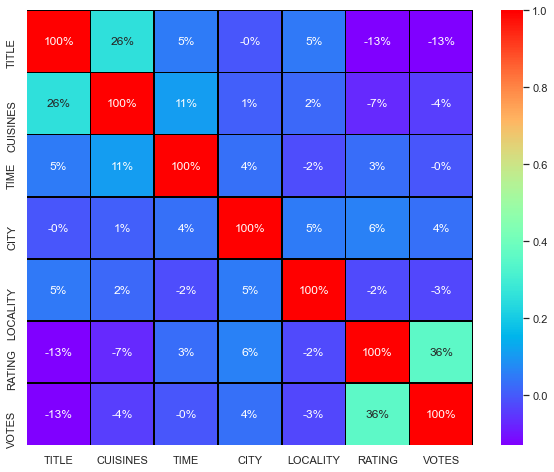

In [97]:
#Plotting heatmap for visualizing the correlation
plt.figure(figsize=(10,8))
sns.heatmap(corr,linewidth=0.5,linecolor='black',fmt='.0%',cmap='rainbow',annot=True)
plt.show()

Observations:

1.There are more postive correlations present in the dataset

2.Highest positive correlated column is Votes with Rating and has a value of 36%.

3.Highest negatively correlated column is Title with Votes and Rating and it has a value of -13%

4.Positively correlated columns have a high impact with the target variable whereas negatively correlated columns have less or zero impact with the target variable.

# Checking skewness

In [98]:
df_test.skew()

TITLE      -0.019891
CUISINES   -0.211171
TIME        0.314497
CITY        0.115001
LOCALITY    0.302174
RATING     -0.611365
VOTES       7.175634
dtype: float64

Votes and Rating column have high skewness and it can be due to the presence of outliers

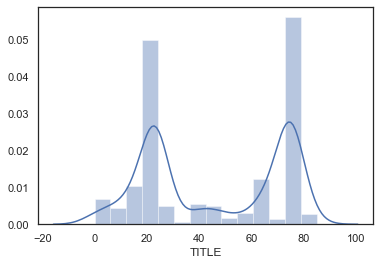

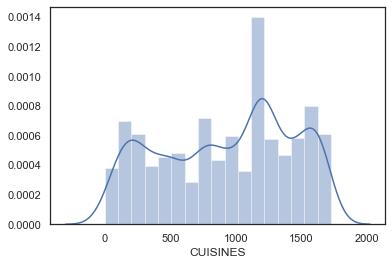

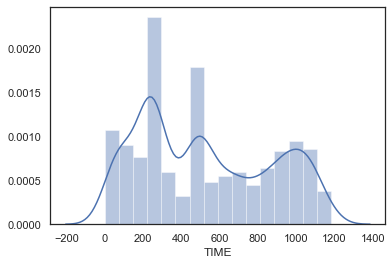

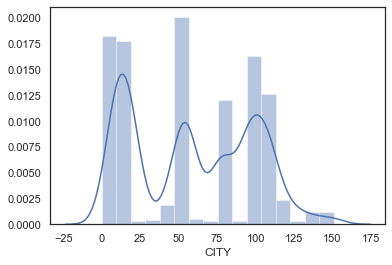

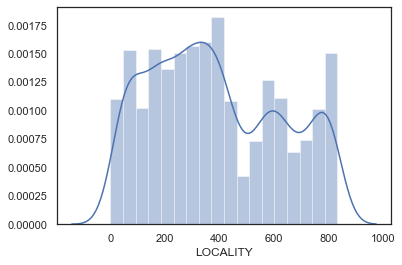

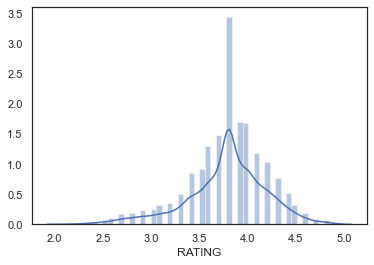

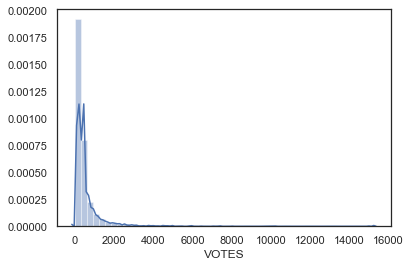

In [99]:
#Plotting distplot for checking the distribution of skewness
for col in df_test.describe().columns:
    sns.set(style='white')
    sns.distplot(df_test[col])
    plt.show()

All the features data are not normally distributed and it is due to the presence of outliers

# Checking outliers 

We can check outliers by plotting boxplot

In [100]:
collist=df_test.columns.values 
ncol=10
nrows=10

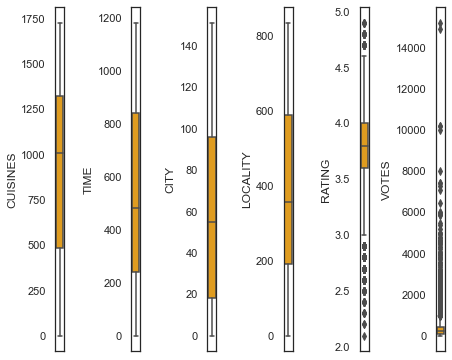

In [101]:
#Lets visualize outliers through boxplots
plt.figure(figsize=(ncol,5*ncol))
for i in range (1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df_test[collist[i]],color='orange',orient='v')
    plt.tight_layout()

As there are outliers present in this dataset, we can handle them by using z-score

# Handling outliers by using z-score method

In [102]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df_test))   #converting all values into absolute values
threshold=3    #setting up a threshold
np.where(z>3)

(array([  31,   78,   83,   86,   92,  282,  377,  479,  534,  716,  730,
         759,  763,  804,  875,  880,  888,  932,  987, 1093, 1098, 1111,
        1130, 1147, 1156, 1173, 1301, 1308, 1314, 1324, 1467, 1506, 1550,
        1620, 1649, 1659, 1692, 1751, 1785, 1789, 1796, 1870, 1919, 1998,
        2019, 2093, 2121, 2130, 2140, 2178, 2194, 2215, 2282, 2304, 2315,
        2326, 2355, 2357, 2363, 2415, 2486, 2490, 2594, 2639, 2641, 2657,
        2697, 2749, 2771, 2798, 2834, 2843, 2850, 2911, 2940, 2962, 3015,
        3041, 3129, 3130, 3209, 3229, 3279, 3317, 3321, 3386, 3442, 3443,
        3501, 3520, 3554, 3683, 3703, 3728, 3734, 3788, 3843, 3857, 3950,
        4006, 4047, 4067, 4119, 4124, 4151, 4163], dtype=int64),
 array([6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 6,
        5, 6, 6, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5, 6, 5, 6,
        6, 6, 5, 6, 6, 5, 6, 6, 5, 6, 5, 6, 6, 5, 6, 6, 6, 5, 5, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 

In [103]:
#Removing outliers
df_newtest=df_test[(z<3).all(axis=1)]
df_newtest

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,23,1293,503,110,662,4.3,564.000000
1,75,1632,933,96,221,4.2,61.000000
2,23,1455,219,96,411,3.8,350.000000
3,66,208,1071,41,456,3.8,1445.000000
4,75,1637,208,78,300,3.6,23.000000
...,...,...,...,...,...,...,...
4226,23,1425,103,108,597,3.9,287.000000
4227,66,267,262,9,237,4.3,469.000000
4228,75,679,1052,41,696,3.7,53.000000
4229,75,1541,215,78,332,3.8,429.769391


In [104]:
df_test.shape   #Original dataset dimensions

(4231, 7)

In [105]:
df_newtest.shape  #New dataset dimensions

(4125, 7)

Nearly 100 rows of data had outliers and it has been removed by using z-score method

# Percentage loss of data after removal of outliers

In [106]:
percentage_loss=((106)/4231)*100   #106 = 4231-4125
print(percentage_loss)

2.505317891751359


2.5% of data has been lost due to the removal of outliers

# Treating skewness

In [107]:
#We are treating skewness by using square root transform
for col in df_newtest.skew().index:
    if col in df_newtest.describe().columns:
        if df_newtest[col].skew()>0.55:
            df_newtest[col]=np.cbrt(df_newtest[col])
        if df_newtest[col].skew()<-0.55:
            df_newtest[col]=np.sqrt(df_newtest[col])

In [108]:
df_newtest.skew()   #Checking skewness after treating it

TITLE      -0.035775
CUISINES   -0.206386
TIME        0.311597
CITY        0.111860
LOCALITY    0.296992
RATING     -0.481994
VOTES       0.523276
dtype: float64

The skewness present in the data has been treated and now we can proceed further with the predictions of test data we have

# Loading the saved best model

In [109]:
fitted_model=pickle.load(open('RestaurantCost_Project.pkl','rb'))

In [110]:
fitted_model   #Checking the model we have saved

GradientBoostingRegressor(n_estimators=500, random_state=162)

We can see that GradientBoostingRegressor algorithm, which was finalized and saved after we found that it was the best model performing, is loaded and it is also showing the best parameters we obtained while doing Hyperparameter Tuning.

# Predictions over test data

In [111]:
test_predictions=fitted_model.predict(df_newtest)   #Predicting the values

We have predicted the values over the test data and now we will save the predicted values separately

# Saving the predicted values

In [112]:
test_results=pd.DataFrame(test_predictions)
test_results.to_csv('RestaurantCost_Project_TestDataResults.csv')

# Conclusion

-> After getting an insight of this dataset, we were able to understand that the cost given in the restaurants are done on basis of different features.

-> First we loaded the train dataset and did the EDA process and other pre-processing techniques like skewness check and removal, handling the outliers present, filling the missing data, visualizing the distribution of data,etc.

-> Then we did the model training, building the model and finding out the best model on the basis of different metrices scores we got like Mean Absolute Error, Mean squared Error, Root Mean Squared Error, etc.

-> We got Decision Tree Regressor and KNeighbors Regressor Algorithms as the best algorithms among all as it gave more r2_score and cross_val_score. Then for finding out the best parameter and improving the scores, we performed Hyperparameter Tuning.

-> As the scores were not increased, we also tried using Ensemble Techniques like RandomForestRegressor, AdaBoostRegressor and GradientBoostingRegressor algorithms for boosting up our scores. Finally we concluded that GradientBoostingRegressor was the best performing algorithm, although there were more errors in it and it had less RMSE compared to other algorithms. It gave an r2_score of 71.87 and cross_val_score of 72.27 which is the highest scores among all.

-> We saved the model in a pickle with a filename inorder to use wheneven we require.

-> We predicted the values obtained and saved it separately in a csv file.

-> Then we used the test dataset and performed all the pre-processing pipeline methods to it.

-> After handling outliers and treating skewness, we loaded the saved model that we obtained and did the predictions over the test data and then saving the predictions separately in a csv file.

-> From this project, we learnt that how to handle train and test data separately and how to predict the values from them. This will be useful while we are working in a real-time case study as we can get any new data from the client we work on and we can proceed our analysis by loading the best model we obtained and start working on the analysis of the new data we have.

-> The final result will be the predictions we get from the new data and saving it separately.

-> Overall, we can say that this dataset is better but not upto the mark for predicting the Restaurant's cost using regression analysis and GradientBoostingRegressor is the best working algorithm model we obtained.

-> We can improve the data by adding more features that are positively correlated with the target variable, having less outliers, normally distributed values, etc.